### Tutorial de  Julia para Otimização
## Escola de Verão - EMap/FGV
## Aula 03 - Modelagem e Solvers em Julia

### Ministrante
- Luiz-Rafael Santos ([LABMAC/UFSC/Blumenau](http://labmac.mat.blumenau.ufsc.br))
    * Email para contato: [l.r.santos@ufsc.br](mailto:l.r.santos@ufsc.br) ou [lrsantos11@gmail.com](mailto:lrsantos11@ufsc.br)
	- Repositório do curso no [Github](https://github.com/lrsantos11/Tutorial-Julia-Opt)


### Pacotes para Modelagem



* Pacotes do  [JuliaOpt](https://www.juliaopt.org/)
    
    * [JuMP](https://jump.dev/JuMP.jl/v0.19.0/index.html): lingagem de modelagem algébrica para otimização  linear, quadratica, and não-linear (com ou sem restrições)
        
    * Solver disponibilizados
        * [GLPK](https://github.com/jump-dev/GLPK.jl) para otimização linear e inteira (código-aberto)
        * [Ipopt](https://github.com/jump-dev/Ipopt.jl) para otimização não-linear (código-aberto)
        * [Gurobi](https://github.com/jump-dev/Gurobi.jl), KNitro, CPLEX, Xpress, Mosek 
* [JuliaSmoothOptimizers (JSO)](https://juliasmoothoptimizers.github.io/) coleção de pacotes em Julia para desenvolvimento, teste e *benchmark* de algoritmos de otimização (não-linear).
    
    * Modelagem
        * [NLPModels](https://github.com/JuliaSmoothOptimizers/NLPModels.jl): API para representar problemas de otimização `min f(x) s.t. l <= c(x) <= u`
    * Respositórios de problemas
        * [CUtEst.jl](https://github.com/JuliaSmoothOptimizers/CUTEst.jl): interface para o [CUTEst](http://ccpforge.cse.rl.ac.uk/gf/project/cutest/wiki), repositório de problemas de otimização para teste  comparação de algoritmos de otimização.

In [183]:
using Pkg
pkg"activate ../."
pkg"instantiate"

 Activating environment at `~/Dropbox/extensao/cursos/2021/Tutorial-Julia-Opt/Project.toml`


## Instalando os pacotes

* Vamos instalar:
    * o pacote de modelagem `JuMP`
    * os solvers `GLPK`, `Ipopt` e `Gurobi` 
        * Os dois primeiros são código-aberto e Julia vai instalar não só a interface como o próprio programa ou biblioteca
        * `Gurobi` depende de o programa estar instalado e de licensa (eu tenho acadêmica), então não deve funcionar em qualquer ambiente computacional. 

In [184]:
#pkg"add JuMP GLPK Ipopt"
#Descomente a linha acima e comente a linha abaixo caso não possua Gurobi instalado
pkg"add JuMP GLPK Ipopt Gurobi"

  Resolving package versions...
No Changes to `~/Dropbox/extensao/cursos/2021/Tutorial-Julia-Opt/Project.toml`
No Changes to `~/Dropbox/extensao/cursos/2021/Tutorial-Julia-Opt/Manifest.toml`


In [185]:
# using Plots, LinearAlgebra, JuMP, GLPK, Ipopt 
#Descomente a linha acima e comente a linha abaixo caso não possua Gurobi instalado
using Plots, LinearAlgebra, JuMP, GLPK, Ipopt, Gurobi

### Exemplo 1 - Programação Linear

* O problema de programação linear pode ser dado da forma
$$
\begin{align}
&\min  &c^{T} x \\
&\text { s.a } &A x=b \\
&& x \geq 0
\end{align}.
$$

* Vamos utilizar `JuMP` para modelar um problema e os três (ou dois) solvers disponíveis pra resolvê-lo.

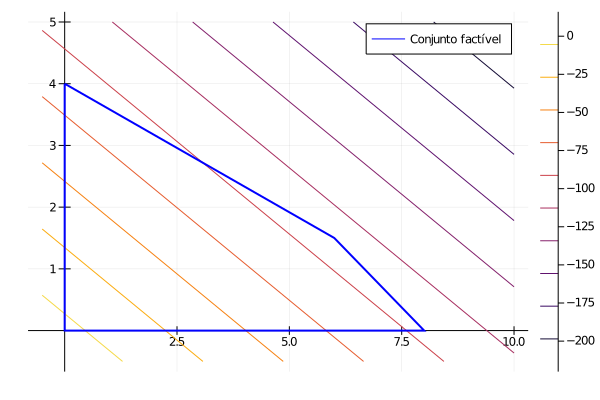

In [186]:
function plot_factivel()
    contour(range(-0.5, 10, length=100), range(-0.5, 5, length=100), 
        (x,y)->-12x-20y, 
        levels=10,
        frame_style=:origin)
    plot!([0;  0 ; 8; 6  ; 0 ],
      [ 4; 0 ; 0; 1.5 ; 4], c=:blue, lw=2, lab="Conjunto factível",series=:path)
end
plot_factivel()

* Considere o problema
$$
\begin{align*}
& \min & -12x - 20y \\
& \;\;\text{s.t.} & 3x + 4y \leq 24 \\
& & 5x + 12y \leq 48 \\
& & x \geq 0 \\
& & y \geq 0 \\
\end{align*}
$$

In [191]:
# Modelo e Solver
model = Model(Ipopt.Optimizer)

# Variaveis, canalizações (ou caixas) e tipo
@variable(model,x>=0)
@variable(model,y>=0)

# Restrições
@constraint(model,3x + 4y <=24)
@constraint(model,5x + 12y <=48)

# Função objetivo
@objective(model,Min,-12x -20y)

print(model)

Min -12 x - 20 y
Subject to
 3 x + 4 y ≤ 24.0
 5 x + 12 y ≤ 48.0
 x ≥ 0.0
 y ≥ 0.0


This is Ipopt version 3.13.2, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        4
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:        2
                     variables with only lower bounds:        2
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        2

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -

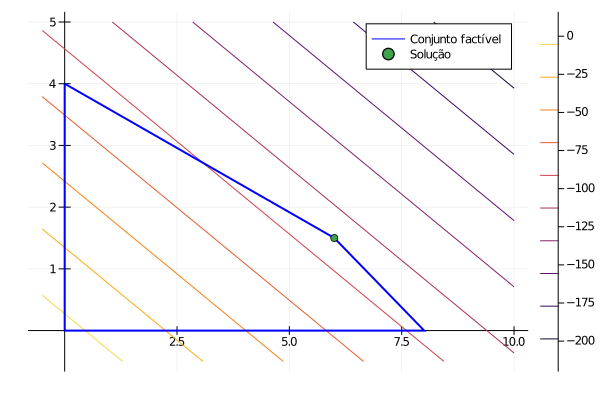

In [192]:
# Chamada do Solver
optimize!(model)

#Declarar solução
@show value(x)
@show value(y)
@show objective_value(model)
plot_factivel()
scatter!([value(x)],[value(y)],label="Solução")

### Vamos olhar para cada linha do código

* Um modelo é um objeto que contém as variáveis, as restrições, as opções do solver
* São criados com a função `Model()`.
* Um modelo pode ser criado sem o solver

```julia
model = Model(GLPK.Optimizer)
``` 

* Uma variável é modelada usando `@variable(nome_modelo,  nome_variavel_e_limitantes, variable_type)`. 

* Limitantes podem ser superiores ou inferiores. Caso não definido, a variável é tratada como real
```julia
@variable(model, x >= 0)
@variable(model, y >= 0)
``` 


* Uma restrição é modelada usando  `@constraint(nome_modelo, restricao)`.
```julia
@constraint(model, 3x + 4y <= 24)
@constraint(model, 5x + 12y <= 48)
``` 



* A função objetivo é declarada usando `@objective(ome_modelo, Min/Max, function a ser otimizada)`

* `print(nome_modelo)` imprime o modelo (opcional).
```julia
@objective(model, Min, -12x - 20y)
print(model)
``` 


* Para resolver o problema de otimização chamamos a funlção `optimize`
```julia
optimize!(model)
``` 

* `x` e `y` são variáveis que estão no *workspace* mas para obtermos seus valores precisamos da função `value`

* Da mesma maneira, para obter o valor da função objetivo no ótimo usamos `objective_value(nome_modelo)`

```julia
@show value(x);
@show value(y);
@show objective_value(model);
``` 

## Exemplo 2 - Problema das $N$-rainhas (Problema de Factibilidade)

> O problema das $N$-rainhas consiste em um tabuleiro de xadrez de tamanho $N\times N$ no qual se quer colocar $N$ rainhas de tal modo que nenhuma rainha possa atacar outra. No xadrez, uma rainha pode se mover verticalmente, horizontalmente e diagonalmente. Desta maneira, não pode haver mais de uma rainha em nenhuma linha, coluna ou diagonal do tabuleiro.

![alt text](img/n_queens4.png "Solução para 4-rainhas")

In [223]:
N = 16
Nrainhas = Model(Gurobi.Optimizer)

#Definindo as variáveis
@variable(Nrainhas,x[i=1:N,j=1:N],Bin)

Academic license - for non-commercial use only - expires 2021-03-27


16×16 Array{VariableRef,2}:
 x[1,1]   x[1,2]   x[1,3]   x[1,4]   x[1,5]   …  x[1,14]   x[1,15]   x[1,16]
 x[2,1]   x[2,2]   x[2,3]   x[2,4]   x[2,5]      x[2,14]   x[2,15]   x[2,16]
 x[3,1]   x[3,2]   x[3,3]   x[3,4]   x[3,5]      x[3,14]   x[3,15]   x[3,16]
 x[4,1]   x[4,2]   x[4,3]   x[4,4]   x[4,5]      x[4,14]   x[4,15]   x[4,16]
 x[5,1]   x[5,2]   x[5,3]   x[5,4]   x[5,5]      x[5,14]   x[5,15]   x[5,16]
 x[6,1]   x[6,2]   x[6,3]   x[6,4]   x[6,5]   …  x[6,14]   x[6,15]   x[6,16]
 x[7,1]   x[7,2]   x[7,3]   x[7,4]   x[7,5]      x[7,14]   x[7,15]   x[7,16]
 x[8,1]   x[8,2]   x[8,3]   x[8,4]   x[8,5]      x[8,14]   x[8,15]   x[8,16]
 x[9,1]   x[9,2]   x[9,3]   x[9,4]   x[9,5]      x[9,14]   x[9,15]   x[9,16]
 x[10,1]  x[10,2]  x[10,3]  x[10,4]  x[10,5]     x[10,14]  x[10,15]  x[10,16]
 x[11,1]  x[11,2]  x[11,3]  x[11,4]  x[11,5]  …  x[11,14]  x[11,15]  x[11,16]
 x[12,1]  x[12,2]  x[12,3]  x[12,4]  x[12,5]     x[12,14]  x[12,15]  x[12,16]
 x[13,1]  x[13,2]  x[13,3]  x[13,4]  x[13,5] 

In [224]:
# Restrições em relação a soma das linhas
@constraint(Nrainhas,[sum(x[i,:]) for i=1:N] .== 1)


16-element Array{ConstraintRef{Model,MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64},MathOptInterface.EqualTo{Float64}},ScalarShape},1}:
 x[1,1] + x[1,2] + x[1,3] + x[1,4] + x[1,5] + x[1,6] + x[1,7] + x[1,8] + x[1,9] + x[1,10] + x[1,11] + x[1,12] + x[1,13] + x[1,14] + x[1,15] + x[1,16] = 1.0
 x[2,1] + x[2,2] + x[2,3] + x[2,4] + x[2,5] + x[2,6] + x[2,7] + x[2,8] + x[2,9] + x[2,10] + x[2,11] + x[2,12] + x[2,13] + x[2,14] + x[2,15] + x[2,16] = 1.0
 x[3,1] + x[3,2] + x[3,3] + x[3,4] + x[3,5] + x[3,6] + x[3,7] + x[3,8] + x[3,9] + x[3,10] + x[3,11] + x[3,12] + x[3,13] + x[3,14] + x[3,15] + x[3,16] = 1.0
 x[4,1] + x[4,2] + x[4,3] + x[4,4] + x[4,5] + x[4,6] + x[4,7] + x[4,8] + x[4,9] + x[4,10] + x[4,11] + x[4,12] + x[4,13] + x[4,14] + x[4,15] + x[4,16] = 1.0
 x[5,1] + x[5,2] + x[5,3] + x[5,4] + x[5,5] + x[5,6] + x[5,7] + x[5,8] + x[5,9] + x[5,10] + x[5,11] + x[5,12] + x[5,13] + x[5,14] + x[5,15] + x[5,16] = 1.0
 x[6,1] + x[6,2] + x[6,3] + x[6,4] + x[6,5] + x[6,6

In [225]:
# Restrições em relação a soma das colunas
@constraint(Nrainhas,[sum(x[:,j]) for j=1:N] .== 1)


16-element Array{ConstraintRef{Model,MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64},MathOptInterface.EqualTo{Float64}},ScalarShape},1}:
 x[1,1] + x[2,1] + x[3,1] + x[4,1] + x[5,1] + x[6,1] + x[7,1] + x[8,1] + x[9,1] + x[10,1] + x[11,1] + x[12,1] + x[13,1] + x[14,1] + x[15,1] + x[16,1] = 1.0
 x[1,2] + x[2,2] + x[3,2] + x[4,2] + x[5,2] + x[6,2] + x[7,2] + x[8,2] + x[9,2] + x[10,2] + x[11,2] + x[12,2] + x[13,2] + x[14,2] + x[15,2] + x[16,2] = 1.0
 x[1,3] + x[2,3] + x[3,3] + x[4,3] + x[5,3] + x[6,3] + x[7,3] + x[8,3] + x[9,3] + x[10,3] + x[11,3] + x[12,3] + x[13,3] + x[14,3] + x[15,3] + x[16,3] = 1.0
 x[1,4] + x[2,4] + x[3,4] + x[4,4] + x[5,4] + x[6,4] + x[7,4] + x[8,4] + x[9,4] + x[10,4] + x[11,4] + x[12,4] + x[13,4] + x[14,4] + x[15,4] + x[16,4] = 1.0
 x[1,5] + x[2,5] + x[3,5] + x[4,5] + x[5,5] + x[6,5] + x[7,5] + x[8,5] + x[9,5] + x[10,5] + x[11,5] + x[12,5] + x[13,5] + x[14,5] + x[15,5] + x[16,5] = 1.0
 x[1,6] + x[2,6] + x[3,6] + x[4,6] + x[5,6] + x[6,6

In [226]:
x

16×16 Array{VariableRef,2}:
 x[1,1]   x[1,2]   x[1,3]   x[1,4]   x[1,5]   …  x[1,14]   x[1,15]   x[1,16]
 x[2,1]   x[2,2]   x[2,3]   x[2,4]   x[2,5]      x[2,14]   x[2,15]   x[2,16]
 x[3,1]   x[3,2]   x[3,3]   x[3,4]   x[3,5]      x[3,14]   x[3,15]   x[3,16]
 x[4,1]   x[4,2]   x[4,3]   x[4,4]   x[4,5]      x[4,14]   x[4,15]   x[4,16]
 x[5,1]   x[5,2]   x[5,3]   x[5,4]   x[5,5]      x[5,14]   x[5,15]   x[5,16]
 x[6,1]   x[6,2]   x[6,3]   x[6,4]   x[6,5]   …  x[6,14]   x[6,15]   x[6,16]
 x[7,1]   x[7,2]   x[7,3]   x[7,4]   x[7,5]      x[7,14]   x[7,15]   x[7,16]
 x[8,1]   x[8,2]   x[8,3]   x[8,4]   x[8,5]      x[8,14]   x[8,15]   x[8,16]
 x[9,1]   x[9,2]   x[9,3]   x[9,4]   x[9,5]      x[9,14]   x[9,15]   x[9,16]
 x[10,1]  x[10,2]  x[10,3]  x[10,4]  x[10,5]     x[10,14]  x[10,15]  x[10,16]
 x[11,1]  x[11,2]  x[11,3]  x[11,4]  x[11,5]  …  x[11,14]  x[11,15]  x[11,16]
 x[12,1]  x[12,2]  x[12,3]  x[12,4]  x[12,5]     x[12,14]  x[12,15]  x[12,16]
 x[13,1]  x[13,2]  x[13,3]  x[13,4]  x[13,5] 

In [227]:
diag(x,3)

13-element Array{VariableRef,1}:
 x[1,4]
 x[2,5]
 x[3,6]
 x[4,7]
 x[5,8]
 x[6,9]
 x[7,10]
 x[8,11]
 x[9,12]
 x[10,13]
 x[11,14]
 x[12,15]
 x[13,16]

In [228]:
# Restrições das diagonais principais
@constraint(Nrainhas,[sum(diag(x,i)) for i = -(N-1):(N-1)] .<=1)

31-element Array{ConstraintRef{Model,MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64},MathOptInterface.LessThan{Float64}},ScalarShape},1}:
 x[16,1] ≤ 1.0
 x[15,1] + x[16,2] ≤ 1.0
 x[14,1] + x[15,2] + x[16,3] ≤ 1.0
 x[13,1] + x[14,2] + x[15,3] + x[16,4] ≤ 1.0
 x[12,1] + x[13,2] + x[14,3] + x[15,4] + x[16,5] ≤ 1.0
 x[11,1] + x[12,2] + x[13,3] + x[14,4] + x[15,5] + x[16,6] ≤ 1.0
 x[10,1] + x[11,2] + x[12,3] + x[13,4] + x[14,5] + x[15,6] + x[16,7] ≤ 1.0
 x[9,1] + x[10,2] + x[11,3] + x[12,4] + x[13,5] + x[14,6] + x[15,7] + x[16,8] ≤ 1.0
 x[8,1] + x[9,2] + x[10,3] + x[11,4] + x[12,5] + x[13,6] + x[14,7] + x[15,8] + x[16,9] ≤ 1.0
 x[7,1] + x[8,2] + x[9,3] + x[10,4] + x[11,5] + x[12,6] + x[13,7] + x[14,8] + x[15,9] + x[16,10] ≤ 1.0
 x[6,1] + x[7,2] + x[8,3] + x[9,4] + x[10,5] + x[11,6] + x[12,7] + x[13,8] + x[14,9] + x[15,10] + x[16,11] ≤ 1.0
 x[5,1] + x[6,2] + x[7,3] + x[8,4] + x[9,5] + x[10,6] + x[11,7] + x[12,8] + x[13,9] + x[14,10] + x[15,11] + x[16,12] ≤ 1.0

In [229]:
x

16×16 Array{VariableRef,2}:
 x[1,1]   x[1,2]   x[1,3]   x[1,4]   x[1,5]   …  x[1,14]   x[1,15]   x[1,16]
 x[2,1]   x[2,2]   x[2,3]   x[2,4]   x[2,5]      x[2,14]   x[2,15]   x[2,16]
 x[3,1]   x[3,2]   x[3,3]   x[3,4]   x[3,5]      x[3,14]   x[3,15]   x[3,16]
 x[4,1]   x[4,2]   x[4,3]   x[4,4]   x[4,5]      x[4,14]   x[4,15]   x[4,16]
 x[5,1]   x[5,2]   x[5,3]   x[5,4]   x[5,5]      x[5,14]   x[5,15]   x[5,16]
 x[6,1]   x[6,2]   x[6,3]   x[6,4]   x[6,5]   …  x[6,14]   x[6,15]   x[6,16]
 x[7,1]   x[7,2]   x[7,3]   x[7,4]   x[7,5]      x[7,14]   x[7,15]   x[7,16]
 x[8,1]   x[8,2]   x[8,3]   x[8,4]   x[8,5]      x[8,14]   x[8,15]   x[8,16]
 x[9,1]   x[9,2]   x[9,3]   x[9,4]   x[9,5]      x[9,14]   x[9,15]   x[9,16]
 x[10,1]  x[10,2]  x[10,3]  x[10,4]  x[10,5]     x[10,14]  x[10,15]  x[10,16]
 x[11,1]  x[11,2]  x[11,3]  x[11,4]  x[11,5]  …  x[11,14]  x[11,15]  x[11,16]
 x[12,1]  x[12,2]  x[12,3]  x[12,4]  x[12,5]     x[12,14]  x[12,15]  x[12,16]
 x[13,1]  x[13,2]  x[13,3]  x[13,4]  x[13,5] 

In [230]:
reverse(x,dims=1)

16×16 Array{VariableRef,2}:
 x[16,1]  x[16,2]  x[16,3]  x[16,4]  x[16,5]  …  x[16,14]  x[16,15]  x[16,16]
 x[15,1]  x[15,2]  x[15,3]  x[15,4]  x[15,5]     x[15,14]  x[15,15]  x[15,16]
 x[14,1]  x[14,2]  x[14,3]  x[14,4]  x[14,5]     x[14,14]  x[14,15]  x[14,16]
 x[13,1]  x[13,2]  x[13,3]  x[13,4]  x[13,5]     x[13,14]  x[13,15]  x[13,16]
 x[12,1]  x[12,2]  x[12,3]  x[12,4]  x[12,5]     x[12,14]  x[12,15]  x[12,16]
 x[11,1]  x[11,2]  x[11,3]  x[11,4]  x[11,5]  …  x[11,14]  x[11,15]  x[11,16]
 x[10,1]  x[10,2]  x[10,3]  x[10,4]  x[10,5]     x[10,14]  x[10,15]  x[10,16]
 x[9,1]   x[9,2]   x[9,3]   x[9,4]   x[9,5]      x[9,14]   x[9,15]   x[9,16]
 x[8,1]   x[8,2]   x[8,3]   x[8,4]   x[8,5]      x[8,14]   x[8,15]   x[8,16]
 x[7,1]   x[7,2]   x[7,3]   x[7,4]   x[7,5]      x[7,14]   x[7,15]   x[7,16]
 x[6,1]   x[6,2]   x[6,3]   x[6,4]   x[6,5]   …  x[6,14]   x[6,15]   x[6,16]
 x[5,1]   x[5,2]   x[5,3]   x[5,4]   x[5,5]      x[5,14]   x[5,15]   x[5,16]
 x[4,1]   x[4,2]   x[4,3]   x[4,4]   x[4,

In [231]:
# Restrições das diagonais secundárias
@constraint(Nrainhas,[sum(diag(reverse(x,dims=1),i)) for i = -(N-1):(N-1)] .<=1)

31-element Array{ConstraintRef{Model,MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64},MathOptInterface.LessThan{Float64}},ScalarShape},1}:
 x[1,1] ≤ 1.0
 x[2,1] + x[1,2] ≤ 1.0
 x[3,1] + x[2,2] + x[1,3] ≤ 1.0
 x[4,1] + x[3,2] + x[2,3] + x[1,4] ≤ 1.0
 x[5,1] + x[4,2] + x[3,3] + x[2,4] + x[1,5] ≤ 1.0
 x[6,1] + x[5,2] + x[4,3] + x[3,4] + x[2,5] + x[1,6] ≤ 1.0
 x[7,1] + x[6,2] + x[5,3] + x[4,4] + x[3,5] + x[2,6] + x[1,7] ≤ 1.0
 x[8,1] + x[7,2] + x[6,3] + x[5,4] + x[4,5] + x[3,6] + x[2,7] + x[1,8] ≤ 1.0
 x[9,1] + x[8,2] + x[7,3] + x[6,4] + x[5,5] + x[4,6] + x[3,7] + x[2,8] + x[1,9] ≤ 1.0
 x[10,1] + x[9,2] + x[8,3] + x[7,4] + x[6,5] + x[5,6] + x[4,7] + x[3,8] + x[2,9] + x[1,10] ≤ 1.0
 x[11,1] + x[10,2] + x[9,3] + x[8,4] + x[7,5] + x[6,6] + x[5,7] + x[4,8] + x[3,9] + x[2,10] + x[1,11] ≤ 1.0
 x[12,1] + x[11,2] + x[10,3] + x[9,4] + x[8,5] + x[7,6] + x[6,7] + x[5,8] + x[4,9] + x[3,10] + x[2,11] + x[1,12] ≤ 1.0
 x[13,1] + x[12,2] + x[11,3] + x[10,4] + x[9,5] + x[8,6]

In [232]:
optimize!(Nrainhas)

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (linux64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 94 rows, 256 columns and 1024 nonzeros
Model fingerprint: 0x416086d9
Variable types: 0 continuous, 256 integer (256 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 4 rows and 0 columns
Presolve time: 0.01s
Presolved: 90 rows, 256 columns, 1038 nonzeros
Variable types: 0 continuous, 256 integer (256 binary)

Root relaxation: objective 0.000000e+00, 100 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

H    0     0                       0.0000000    0.00000  0.00%     -    0s
     0     0    0.00000    0   50    0.00000    0.00000  0.00%     -    0s

Explored 0 nodes (100 si

In [233]:
Int.(value.(x))

16×16 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0

![alt text](img/n_queens.png "Solução para 8-rainhas")

### Exemplo 3 - Voltando pra Rosenbrock


* Vamos usar `JuMP` e `Ipopt`  para minimizar a função (não-linear)de Rosenbrock
$$f(x) = (1-x_1)^2 + 100(x_2-x_1^2)^2$$


In [242]:
rosen = Model(Ipopt.Optimizer)

@variable(rosen,x[1:2])

@NLobjective(rosen,Min,(1-x[1])^2 + 100(x[2]-x[1]^2)^2)

print(rosen)



Min (1.0 - x[1]) ^ 2.0 + 100.0 * (x[2] - x[1] ^ 2.0) ^ 2.0
Subject to


In [243]:
optimize!(rosen)


This is Ipopt version 3.13.2, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

In [239]:
value.(x)

2-element Array{Float64,1}:
 0.9999999999999899
 0.9999999999999792

### Exemplo 4 - Uma aplicação relacionada à pandemia de COVID-19


* Os professores Paulo J. S. Silva e Claudia Sagastizábal da Unicamp criara a página [Vidas Salvas](http://www.ime.unicamp.br/~pjssilva/vidas_salvas.html) com objetivo de  apresentar uma estimativa do número de vidas salvas no país pelo isolamento social durante a pademia de COVID-19. 

* Para tanto fazem ajustes do parâmetro $R_0$ do modelo SEIR, que representa a taxa de replicação do vírus SARS-CoV-2 (o corona vírus que causa a COVID-19) em uma população inteiramente sucetível, tentando descobrir se ele varia no tempo. 


* A página foi escrita em  Jupyter e é executada diariamente para atualizar as informações. O código foi escrito em Julia e JuMP. O $R_0$ foi estmado ajustando os dados oficiais ao modelo SEIR, mas permitindo que o $R_t$ varie no tempo. O problema de otimização não linear é então resolvido usando o solver Ipopt.